# Numerical Python: NumPy


[NumPy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. It contains arrays, math functions, linear algebra, random number capabilities and much more.

# [![Numpy logo](https://numfocus.org/wp-content/uploads/2016/07/numpy-logo-300.png)](https://matplotlib.org/gallery/mplot3d/voxels_numpy_logo.html)

## Data Types in Python
***
Python is what's called a dynamically typed language ↓. This means that every time we preform an action
> _Dynamic typed language - Types are checked during execution of the code.<br>
Static typed language - Types are checked before run-time_

with a variable, the interpreter needs to first check the type of the variable and only then perform the action.  
When we need to execute tons of operations this overhead(checking the type) takes a lot of time (we will see this soon).

### Python integers disguise 
Every time we store an integer in python `x = 10` "behind the scenes" python is storing much more than just the value 10. It's actually storing 4 different values inside a C struct (C struct is the equivalent of a python class):
1. digit - The value of the digit.
1. size - The size of the variable.
1. type - The type of the object.
1. reference count - Helps python with handling memory allocation

Here is a diagram to illustrate (The *PyObject_HEAD* holds the size, type and reference count):
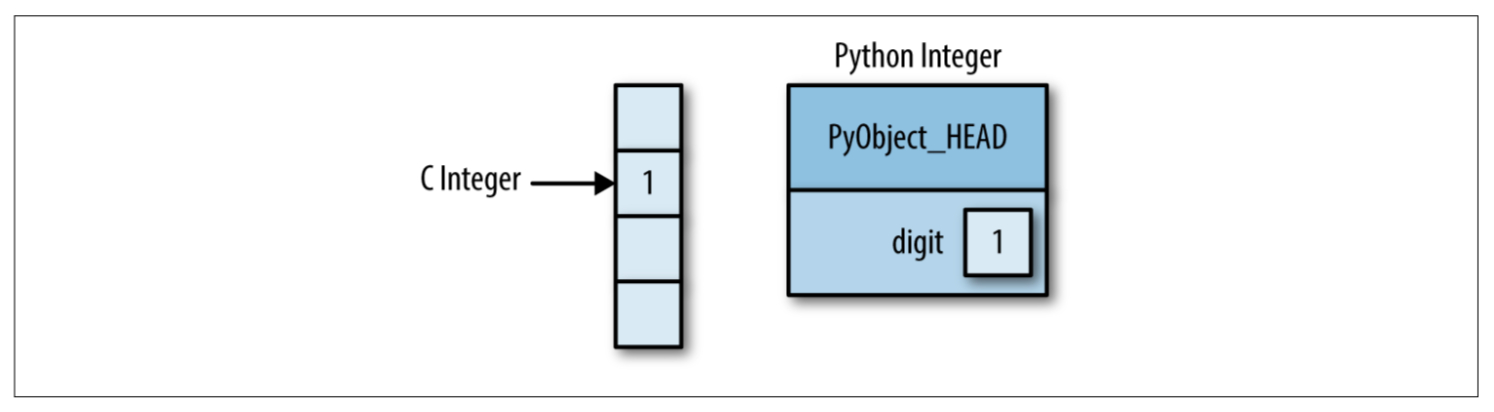

### Python lists are a wolf in sheep's clothing
A python integer is a walk in the park compares to what happen in a python list.  
As we know we can create heterogeneous lists in python:

In [ ]:
l = [1, "string", True, 122.3]

While this flexibility is convenient it also comes at a price. Every element in the list is a python object containing all the extra data we saw at the python integer. And every time we'll enumerate over the data we will need to check the type of the element. So this cost us both in time and memory.  
In cases where we are holding a list of the same type this overhead is redundant.

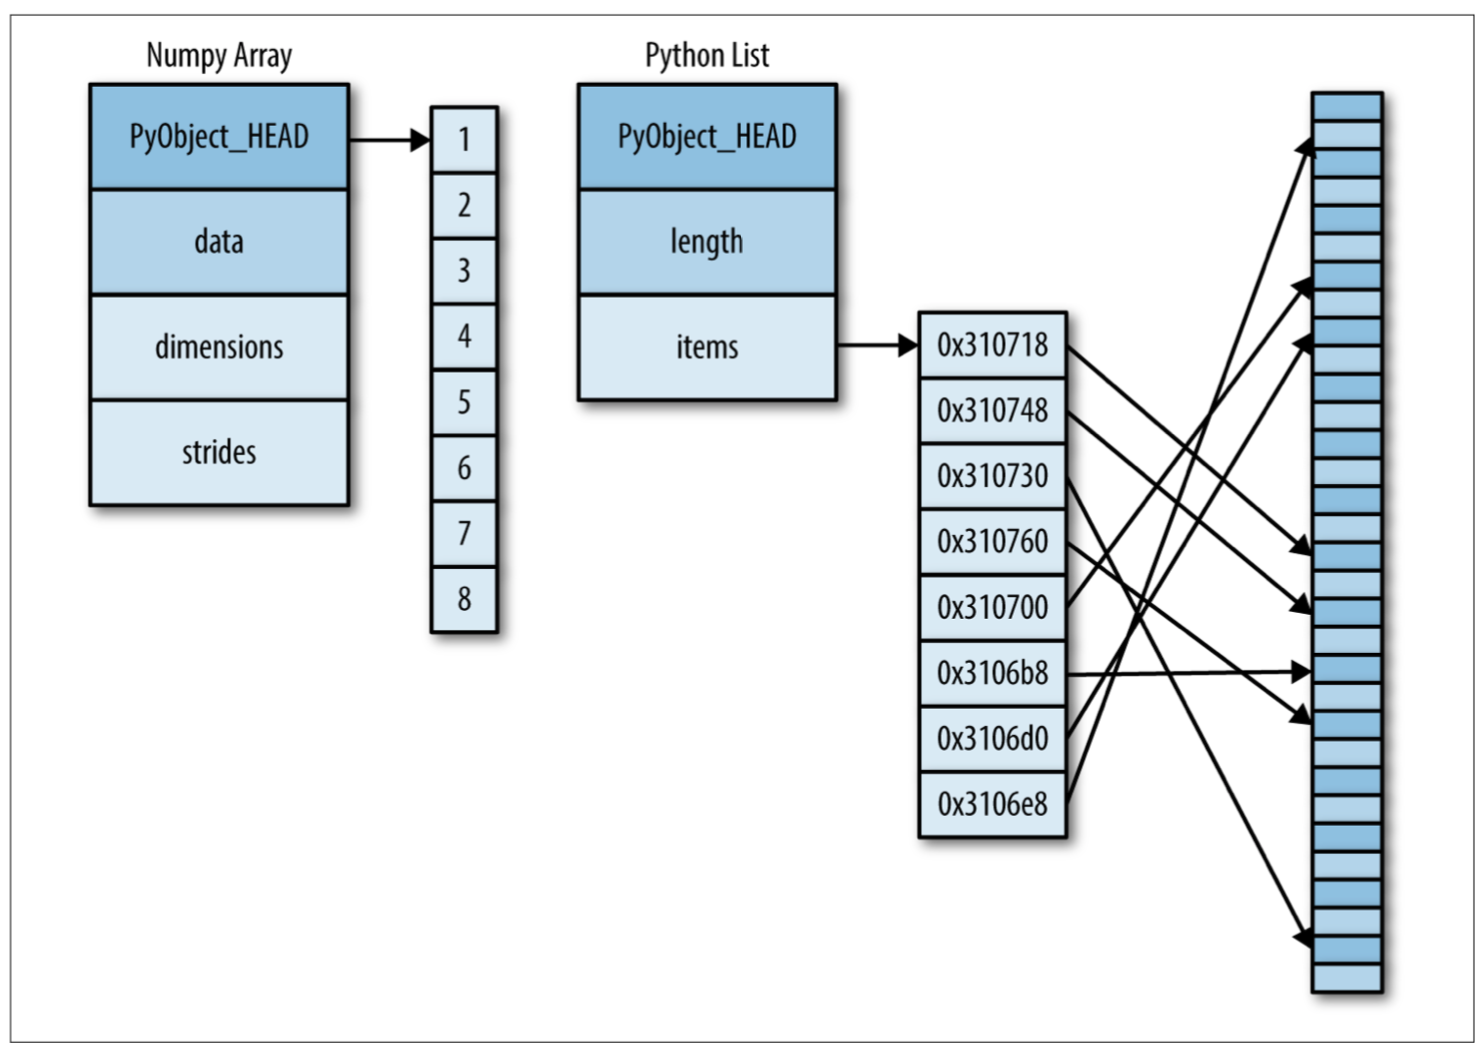

In order to overcome this problem we are going to turn to __Numpy Arrays!__

## Importing NumPy
***

The convention is `import numpy as np`. This loads the entire NumPy package once, and uses an alias `np` so that we don't pollute our code with too much `numpy`.

If you only need specific NumPy objects you can load them using `from numpy import array, ones` etc.

In [2]:
import numpy as np
print("Numpy version:", np.__version__)

Numpy version: 1.15.4


## Numpy Arrays
***
You can think of a numpy array as a list where all the elements **must** be of the same type. Meaning, all the elements in a numpy array will be treated equally, no type checking should take place.

Let's create our first numpy array:

In [2]:
a  = np.array([1., 2, 3, 4])
type(a), a

(numpy.ndarray, array([1., 2., 3., 4.]))

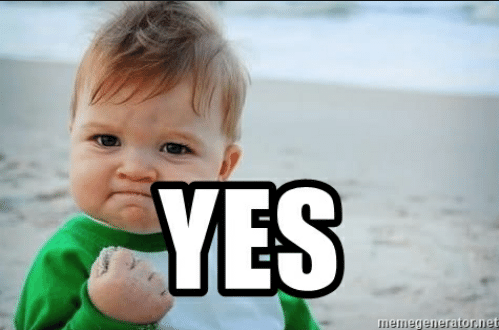

We can see the type of the array is numpy.ndarray. The ndarray stands for n-dimension array.  
We can also specify the type we want our array to be using the `dtype` parameter:

In [3]:
a = np.array([1, 2, 3, 4], dtype=np.float)
type(a), a

(numpy.ndarray, array([1., 2., 3., 4.]))

In [4]:
a = np.array([0, 1, 2, 3], dtype=np.bool)
type(a), a

(numpy.ndarray, array([False,  True,  True,  True]))

### Creating arrays from lists
As we just saw we can create numpy arrays from python lists.  

In [5]:
a = np.array([1,2,3,4]) # Creating a 1d Array.
b = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]]) # Creating a 2d Array.

print(a)
print('='*10)
print(b)

[1 2 3 4]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Array Types
As mentioned before, if we don't set the array type, numpy will infer the type for us.  
We can set the type explicitly should we want to.   
To further query the types in numpy visit : [Numpy Data Types](https://www.numpy.org/devdocs/user/basics.types.html)

In [6]:
a = np.array([1, 2, 3, 4], dtype=np.short)
type(a), a

(numpy.ndarray, array([1, 2, 3, 4], dtype=int16))

This brings out a question - Why would we like to explicitly define our type and not let numpy do the work for us?
🤔

### Creating arrays with numpy methods
We can also create arrays using different numpy methods:

In [7]:
np.zeros(10) # Will create a 1d array of zeros.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.zeros((5, 5)) # Will create a 5*5 matrix of zeros.

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [9]:
np.ones((7, 7)) # Will create a 10*10 matrix of ones.

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [10]:
np.ones((7,7)).dtype

dtype('float64')

In [11]:
np.full((3, 3), 5) # Will create a 3x3 matrix filled with 5.

array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

In [7]:
np.empty((2, 2)) # Creates an uninitalized matrix of 2x2

array([[1.39537051e-311, 1.33511290e-306],
       [2.11392033e-307, 1.60216183e-306]])

Why would we want an uninitialized array? 🤔 

In [13]:
np.arange(5) # Create an array with value 0 to 5 (not including), same as range

array([0, 1, 2, 3, 4])

In [14]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [15]:
np.linspace(0, 10 , 5) # Creates an array with 5 values from 0 to 10 (including) with equal spacing

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

These are just a few examples. There are many more ways of creating numpy array which you will find out when searching for them on Google.

### Creating arrays with numpy random methods
<img src="https://cdn.pixabay.com/photo/2012/04/05/01/24/dice-25637__340.png" width="200" height="">

Another very useful way of creating numpy arrays is by using the numpy random library.<br>
To access the library all you need to do is type `np.random`


In [16]:
np.random.rand(3, 3) # Creates a 3x3 random matrix, each value uniformly from 0 to 1 
                     # (notice the shape of the matrix is not sent as a tuple)

array([[0.83513081, 0.37866167, 0.82770801],
       [0.65235854, 0.34381636, 0.15975097],
       [0.99974062, 0.9451522 , 0.85524513]])

In [17]:
np.random.randint(low=10, high=50, size=(4, 4))

array([[12, 39, 27, 45],
       [46, 16, 41, 14],
       [15, 41, 38, 17],
       [11, 46, 49, 27]])

In [18]:
np.random.normal(loc=0, scale=1, size=(6, 2)) # Creates a 6x2 random matrix, each value is drawn from a
                                              # Normal distribution with mu=0 and var=1

array([[-1.95435166,  0.04536965],
       [ 1.47754425,  0.80695941],
       [ 0.30560179,  0.23123992],
       [-1.23458641, -0.8992042 ],
       [-0.36006619, -1.23855045],
       [-0.81659105,  0.17237422]])

In [19]:
# You can run the following code to see all of the numpy random functions.
np.random?

***
Side Note - Random Generators seed.
***
Every random generator as a seed, which is some base from which it start generating numbers.  
If we want to obtain the same results over and over again we should set the same seed.

Below is an example of this behavior

In [31]:
# Re-run this cell again and again (You can use Ctrl-Enter for that)
np.random.seed(80)
np.random.rand(2,2)

array([[0.52191572, 0.69940637],
       [0.26986897, 0.67448187]])

In [35]:
# Re-run this cell again and again
np.random.rand(2,2)

array([[0.81204355, 0.37293679],
       [0.80964124, 0.01199526]])

***
### Exercise
***
__Create a 2x2x2 ones array__
```py
array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])
```

In [31]:
# Your code starts here
np.ones((2,2,2))
# Your code ends here

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

__Create the following array from a list__
```py
array([[1],
       [2],
       [3],
       [4]])
```

In [4]:
np.array([[1],[2],[3],[4]])

array([[1],
       [2],
       [3],
       [4]])

__Create a 3x3 random matrix with values uniformly distributed between 0 to 2__
```py
array([[1.29723842, 0.98061885, 1.43601699],
       [0.96945455, 1.05210706, 1.70699554],
       [0.33119019, 1.8379815 , 1.23162847]])
```

In [15]:
# Your code starts here
np.random.uniform(high=2,size=(3,3))
# Your code ends here

array([[1.40188317, 1.41251924, 0.56003118],
       [0.96312025, 1.23524366, 1.03495046],
       [1.47583431, 0.35177114, 0.81585901]])

## Numpy Arrays Fundamentals 
***
<img src="http://www.liberaldictionary.com/wp-content/uploads/2019/01/basic-5981.jpg" width="150">

We will now discuss fundamentals topics of the numpy array:

### Attributes of arrays
Each numpy array has a set of attributes we can query :
1. The number of dimensions.
1. The shape (This number of values in each dimension)
1. The size  (The total number of elements in the array)
1. The type of elements in the array.
1. The size of each element.

In [16]:
np.random.seed(26)
a = np.random.rand(5, 2)
a

array([[0.30793495, 0.51939148],
       [0.76829766, 0.78922074],
       [0.87056206, 0.18792139],
       [0.26950525, 0.49619214],
       [0.73912175, 0.19495199]])

In [17]:
print("Number of dim =", a.ndim, 
      "\nShape = ", a.shape,
      "\nSize =",  a.size, 
      "\nType =", a.dtype, 
      "\nElement size =", a.itemsize)

Number of dim = 2 
Shape =  (5, 2) 
Size = 10 
Type = float64 
Element size = 8


In [20]:
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]], dtype = float)
c
print("Number of dim =", c.ndim, 
      "\nShape = ", c.shape,
      "\nSize =",  c.size, 
      "\nType =", c.dtype, 
      "\nElement size =", c.itemsize)

Number of dim = 3 
Shape =  (2, 2, 3) 
Size = 12 
Type = float64 
Element size = 8


### Array Indexing
The familiar way of accessing single elements using square brackets work with numpy array as well

In [21]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
# Using the square brackets
a[3], a[-2]

(3, 10)

In [24]:
# Accessing 2d array
np.random.seed(26)
b = np.random.rand(3, 3)
b

array([[0.30793495, 0.51939148, 0.76829766],
       [0.78922074, 0.87056206, 0.18792139],
       [0.26950525, 0.49619214, 0.73912175]])

In [25]:
b[0, 0], b[1, 1], b[2, 2]

(0.30793495262497084, 0.8705620624758235, 0.7391217471137107)

Notice if we only give one index, we will get an entire row

In [39]:
b[0]

array([0.30793495, 0.51939148, 0.76829766])

### Array slicing
The familiar way of slicing lists using the <font color=blue>[start:stop:step]</font> works with numpy. Same as with indexing you use the comma (,) to separate between dimensions.  

In [46]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [47]:
a[-5::2]

array([15, 17, 19])

In [48]:
a[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

__Slicing a 2d array__

In [49]:
np.random.seed(26)
a = np.random.randint(low=0, high=10, size=(5,5))
a

array([[5, 6, 0, 1, 6],
       [3, 0, 4, 2, 1],
       [7, 3, 5, 9, 4],
       [8, 5, 7, 6, 8],
       [2, 5, 0, 2, 3]])

In [50]:
a[0:2, 0:2]

array([[5, 6],
       [3, 0]])

In [51]:
a[1:3, 2:4]

array([[4, 2],
       [5, 9]])

If we want to access the i'th row of `a` we can use `a[i]`. To access the i'th column we use `a[:, i]` - What what we saying is go through all the rows but only take the `i` value. Can you think of another (redundant) way of accessing the i'th row? 🤔

In [52]:
a[2, :]

array([7, 3, 5, 9, 4])

In [53]:
a[:, 3]

array([1, 2, 9, 6, 2])


**BUT**, you should be aware that the slicing (or indexing if it returns more than 1 value) returns a _view_ of the array and not a copy of it.
> View - Think for a second of the values of the array as some kind of window in the memory, than when you use the slicing notion you get a "peek" to a part of the window. If you change something there you changed it internally.

Everything becomes clearer with an example: [Visualizer](http://www.pythontutor.com/visualize.html#code=import%20numpy%20as%20np%0Aa%20%3D%20np.arange%2825%29.reshape%285,%205%29%0Ab%20%3D%20a%5B1%3A3,%201%3A3%5D%0Ab%5B0,%200%5D%20%3D%20-1%0Ab%5B1,%201%5D%20%3D%20-2&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=py3anaconda&rawInputLstJSON=%5B%5D&textReferences=false)

In [54]:
np.random.seed(26)

a = np.random.randint(low=0, high=10, size=(5,5))
a

array([[5, 6, 0, 1, 6],
       [3, 0, 4, 2, 1],
       [7, 3, 5, 9, 4],
       [8, 5, 7, 6, 8],
       [2, 5, 0, 2, 3]])

In [55]:
b = a[1:3, 1:3] # Taking a 2x2 window into a
b

array([[0, 4],
       [3, 5]])

In [56]:
b[0, 0], b[1, 1] = -1, -2
b

array([[-1,  4],
       [ 3, -2]])

In [57]:
a

array([[ 5,  6,  0,  1,  6],
       [ 3, -1,  4,  2,  1],
       [ 7,  3, -2,  9,  4],
       [ 8,  5,  7,  6,  8],
       [ 2,  5,  0,  2,  3]])

This is because `a[1,1]` and `b[0,0]` points to the same location in memory. So when you change one, you change the other.

Remember this behavior because it works different from the way lists behave in python and so can cause confusion.  
If you **do want a copy** and not a view of the array use `.copy()`.

In [58]:
np.random.seed(26)

a = np.random.randint(low=0, high=10, size=(5,5))
b = a[1:3, 1:3].copy()
b[0,0]= -100
a

array([[5, 6, 0, 1, 6],
       [3, 0, 4, 2, 1],
       [7, 3, 5, 9, 4],
       [8, 5, 7, 6, 8],
       [2, 5, 0, 2, 3]])

***
### Exercise
***
__Create a 4x4 zeros matrix and save it as `Z`__

In [97]:
Z = None
# Your code starts here
Z = np.zeros((4,4))
Z
# Your code ends here

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

__Get a view of the bottom corner of the matrix `Z` (top left corner of the print) of size 2x2 and save it as `W`.__

In [98]:
# Your code starts here
W = Z[0:2,0:2]
W
# Your code ends here

array([[0., 0.],
       [0., 0.]])

__Change W to be a 2x2 matrix filled with 5 but make sure it affects Z as well__

In [99]:
W = W+5
W

array([[5., 5.],
       [5., 5.]])

In [ ]:
Z #WHY IS Z NOT AFFECTED???

***
__Create a 5x5 2d array with 1 on the border and 0 inside and save it as `Z`__
```py
array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])
```

In [104]:
# Your code starts here
Z = np.ones((5,5))
Z[1:4,1:4] = 0
Z
# Your code ends here

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

__Get the first row, 3rd and 5th row of `Z`__
```py
array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])
```

In [105]:
# Your code starts here
Z[::2]
# Your code ends here

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

__Get the 2nd and 4th column of `Z`__
```py
array([[1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.]])
```

In [108]:
# Your code starts here
Z[:,1:3]
# Your code ends here

array([[1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.]])

***
Read the documentation of __np.ravel__ and __np.eye__ and create the following array:
```py
[1., 0., 0., 0., 1., 0., 0., 0., 1.]
```


In [110]:
# Your code starts here
np.ravel(np.eye(3))
# Your code ends here

array([1., 0., 0., 0., 1., 0., 0., 0., 1.])

### Array Reshaping
If we would like, we can change the shape of the array using the reshape method.

In [111]:
g = np.zeros(10)
g

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [112]:
g.reshape(2, 5)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [113]:
g.reshape(5, 2)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In order for the reshape to work we must make sure the __size__ of the original array will match the __size__ of the reshaped array.   
Here is a bad example:

In [114]:
np.zeros(10).reshape(3, 3) # Original array size is 10 but reshaped size is 9

ValueError: cannot reshape array of size 10 into shape (3,3)

Another way to look at it - make sure the product of the shape is equal to size.

In [115]:
np.ones((4, 4)).reshape(2, 8)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

#### Reshaping with np.newaxis.
If we want to reshape an array by "shoving" a new dimension we can use `np.newaxis`
This is most relevant when we want to transform a 1d vector into a 2d row/column vector


In [116]:
v = np.array([1, 2, 3]) # 1D vector
v[np.newaxis, :] # 2d Matrix row vector

array([[1, 2, 3]])

In [117]:
v[:, np.newaxis] # 2d Matrix column vector

array([[1],
       [2],
       [3]])

*************
### Exercise
*************
__Create a 2d array with values ranging from 0 to 24__
```py
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
```

In [133]:
# Your code starts here
np.arange(25).reshape(5,5)
# Your code ends here

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

__Create a 2d array with value going from 8 down to 0__
```py
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [138]:
# Your code starts here
np.arange(9)[::-1].reshape(3,3)
# Your code ends here

array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])

### Concatenation 
There are 3 common ways in which numpy enables you to concatenate arrays:
1. np.concatenate 
1. np.hstack
1. np.vstack

In [139]:
a = np.ones(5)
b = np.zeros(5)
np.concatenate([a, b]) # Notice we need to put the input into a list (tuple will work as well).

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [140]:
np.vstack([a, b, a, b])

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [143]:
np.hstack([a, b])

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [144]:
g = np.arange(9).reshape(3, 3)
np.vstack([g, g])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [145]:
np.hstack([g, g])

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

### Splitting
There are 3 common ways in which numpy enable you to split arrays:
1. np.split 
1. np.vsplit
1. np.hsplit

In [148]:
a = np.arange(10)
np.split(a, indices_or_sections=[2, 7])

[array([0, 1]), array([2, 3, 4, 5, 6]), array([7, 8, 9])]

Notice we inputted 2 values both got back 3 arrays. This is because we "asekd" to cut on the 2nd index and the 7th index. If you make 2 cuts you get 3 pieces.

In [149]:
a = np.arange(16).reshape(4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [150]:
a_upper, a_below = np.vsplit(a, indices_or_sections=[2])

In [151]:
a_upper

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [152]:
a_below

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [153]:
a_left, a_right = np.hsplit(a, indices_or_sections=[3])

In [154]:
a_left

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14]])

In [155]:
a_right

array([[ 3],
       [ 7],
       [11],
       [15]])

# Numpy Universal Functions
***
Ok, so we have built arrays with a single type? How do we put that to good use?  
The answer is the numpy __universal function (ufuncs)__ which allows fast computation by leveraging the use of vectorized code.  
As we've mentioned above, one of the reason looping over a long list and preforming many operations is slow, is because the interpreter needs to check the type of the element on each iteration.  
Here is an example

In [156]:
def compute_square(values):
    output = np.empty(len(values))
    for i, val in enumerate(values):
        output[i] = val ** 2
    
    return output

values_small = np.arange(5)
compute_square(values_small)

array([ 0.,  1.,  4.,  9., 16.])

Let's try timing this on a very large array

In [157]:
values_big = np.arange(5_000_000)
%timeit compute_square(values_big)

2.1 s ± 298 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This will be machine dependent, but as we can see this takes around ~2 seconds

###  UFuncs to the rescue.
Numpy exposes an easy interface for many operations allowing us to preform statically typed (no need to type check) compiled routine. Basically, enabling us to perform element wise operations on the array. We call this operations vectorized operation.

In [158]:
values_small ** 2

array([ 0,  1,  4,  9, 16], dtype=int32)

And let's see how much time this takes on our large array

In [159]:
%timeit (values_big ** 2)

9.44 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<img src="https://media2.giphy.com/media/3o7btNa0RUYa5E7iiQ/source.gif" alt="Alt text that describes the graphic" title="Title text" width="200" height="200"/>

This vectorized operations are implemented via ufuncs. If you remember how classes work in python, then you can guess how `values_big**2` actually calls a ufunc and not python power operation (HINT - Magic).  

Ok, so we just saw we can preform an operation quickly between our array an a scalar but, we can also preform operation between 2 numpy arrays

In [160]:
a = np.arange(10)
b = np.ones(10) * 3 # Vectorized operation between an array and a scalar
a + b # Vectorized operation between 2 arrays.

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

So ufuncs operates on numpy arrays in a element by element fashion, and the reason it is much faster than using python loops is because ufuncs are implemented in compiled C language.   
It's worth noting - Not only is the operation much faster, it is also much easier to read. (just look at the square example).   
One last thing - ufunc usually return a new array and do not change the original array.

### ufunc universe
There is a vast number of ufunc available for you to use, but let's start with some of the basics:
* All of python arithmetic operations.
* All of python boolean bitwise operations (will discuss next week)
* Trigonometric Functions which you can use using np.cos(array), np.sin(array)
* Exponents and logarithms np.exp(array), np.log(array)

And you can probably guess the ufuncs works not only on 1d arrays.
Let's explore:

#### Arithmetic

In [161]:
np.ones((3,3)) / 9

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [162]:
np.ones((3, 3)) * 2 

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [163]:
np.ones((3, 3)) * 4 + np.eye(3)

array([[5., 4., 4.],
       [4., 5., 4.],
       [4., 4., 5.]])

In [164]:
np.ones((3,3)) - np.eye(3)

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [8]:
np.arange(9).reshape(3, 3) * (np.ones((3,3)) - (np.eye(3)*1/2))

array([[0., 1., 2.],
       [3., 2., 5.],
       [6., 7., 4.]])

#### Trigo

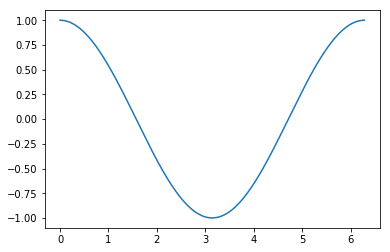

In [14]:
a = np.linspace(0, 2 * np.pi, 360)

import matplotlib.pyplot as plt 
plt.plot(a, np.cos(a))

In [16]:
a

array([0.        , 0.01750191, 0.03500382, 0.05250573, 0.07000764,
       0.08750954, 0.10501145, 0.12251336, 0.14001527, 0.15751718,
       0.17501909, 0.192521  , 0.21002291, 0.22752482, 0.24502673,
       0.26252863, 0.28003054, 0.29753245, 0.31503436, 0.33253627,
       0.35003818, 0.36754009, 0.385042  , 0.40254391, 0.42004581,
       0.43754772, 0.45504963, 0.47255154, 0.49005345, 0.50755536,
       0.52505727, 0.54255918, 0.56006109, 0.57756299, 0.5950649 ,
       0.61256681, 0.63006872, 0.64757063, 0.66507254, 0.68257445,
       0.70007636, 0.71757827, 0.73508018, 0.75258208, 0.77008399,
       0.7875859 , 0.80508781, 0.82258972, 0.84009163, 0.85759354,
       0.87509545, 0.89259736, 0.91009926, 0.92760117, 0.94510308,
       0.96260499, 0.9801069 , 0.99760881, 1.01511072, 1.03261263,
       1.05011454, 1.06761644, 1.08511835, 1.10262026, 1.12012217,
       1.13762408, 1.15512599, 1.1726279 , 1.19012981, 1.20763172,
       1.22513363, 1.24263553, 1.26013744, 1.27763935, 1.29514

In [13]:
a[:5], np.cos(a)[:5] # first 5 x values and 5 cos(x) values

(array([0.        , 0.01750191, 0.03500382, 0.05250573, 0.07000764]),
 array([1.        , 0.99984685, 0.99938743, 0.99862189, 0.99755047]))

#### Exponent and log

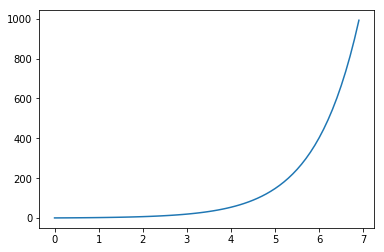

In [17]:
a = np.arange(0, 7, 0.1)

import matplotlib.pyplot as plt
plt.plot(a, np.exp(a))

In [18]:
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9])

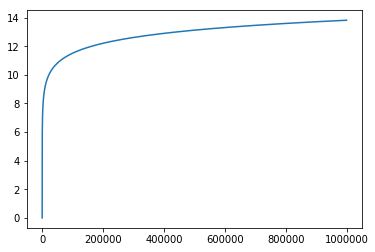

In [37]:
a = np.arange(1, 1_000_000)

import matplotlib.pyplot as plt
plt.plot(a, np.log(a))

***
## Exercise
***
Only use vectorized code to solve the following exercises.

In [38]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

__Add 3 to each value in `a` (Don't change `a`)__
```py
array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
```

In [39]:
# Your code starts here
a+3
# Your code ends here

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

__subtract 5 from each value of `a` and then multiply each value by `5`__
```py
array([-25, -20, -15, -10,  -5,   0,   5,  10,  15,  20])
```

In [40]:
# Your code starts here
(a-5)*5
# Your code ends here

array([-25, -20, -15, -10,  -5,   0,   5,  10,  15,  20])

__Multiply the even positioned values of `a` by `10`__
```py
array([ 0, 20, 40, 60, 80])
```

In [42]:
# Your code starts here
a[::2]*10
# Your code ends here

array([ 0, 20, 40, 60, 80])

***
__Create a 5x5 matrix filled with 10's except the diagonal which should be 5's__
```py
array([[ 5., 10., 10., 10., 10.],
       [10.,  5., 10., 10., 10.],
       [10., 10.,  5., 10., 10.],
       [10., 10., 10.,  5., 10.],
       [10., 10., 10., 10.,  5.]])
```

In [45]:
# Your code starts here
np.ones((5,5))*10-(np.eye(5,5)*5)
# Your code ends here

array([[ 5., 10., 10., 10., 10.],
       [10.,  5., 10., 10., 10.],
       [10., 10.,  5., 10., 10.],
       [10., 10., 10.,  5., 10.],
       [10., 10., 10., 10.,  5.]])

***
__Some trigonometric remainder : in order to convert polar $\theta, r$ coordinates to cartesian $x, y$ we use:  
$x = r \cdot cos(\theta)$  
$ y = r \cdot sin(\theta)$  
You have a single $r$ and an array of $\theta$ find the x and y coordinates.__

In [53]:
r = 2
θ = np.linspace(0, np.pi*2, 360) 
x = np.cos(θ) * r
y = np.sin(θ) * r

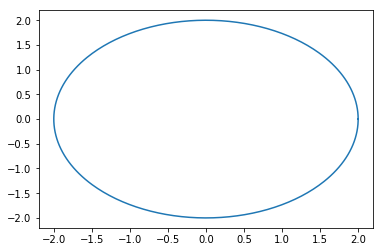

In [47]:
import matplotlib.pyplot as plt
plt.plot(x, y)

***
__Create an array with the inverse ($1/x$) of the even numbers lower than or equal to 100.__

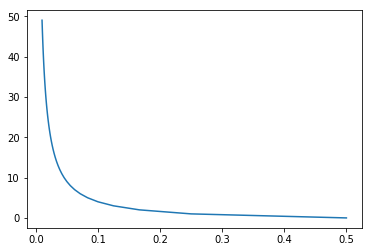

In [66]:
# Your code starts here
a=1/np.arange(1,101)[1::2]
import matplotlib.pyplot as plt
plt.plot(a,range(len(a)))
# Your code ends here